In [1]:
!pip install gensim

In [2]:
import gensim
from gensim.models import word2vec
from gensim.models import KeyedVectors

In [3]:
!pwd

/Users/makino/PythonFile/100nock_7


In [4]:
EMBEDDING_FILE = '~/Downloads/GoogleNews-vectors-negative300.bin.gz'
word_vectors = KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)

In [4]:
print(word_vectors)

In [5]:
print(word_vectors['United_States'])

[-3.61328125e-02 -4.83398438e-02  2.35351562e-01  1.74804688e-01
 -1.46484375e-01 -7.42187500e-02 -1.01562500e-01 -7.71484375e-02
  1.09375000e-01 -5.71289062e-02 -1.48437500e-01 -6.00585938e-02
  1.74804688e-01 -7.71484375e-02  2.58789062e-02 -7.66601562e-02
 -3.80859375e-02  1.35742188e-01  3.75976562e-02 -4.19921875e-02
 -3.56445312e-02  5.34667969e-02  3.68118286e-04 -1.66992188e-01
 -1.17187500e-01  1.41601562e-01 -1.69921875e-01 -6.49414062e-02
 -1.66992188e-01  1.00585938e-01  1.15722656e-01 -2.18750000e-01
 -9.86328125e-02 -2.56347656e-02  1.23046875e-01 -3.54003906e-02
 -1.58203125e-01 -1.60156250e-01  2.94189453e-02  8.15429688e-02
  6.88476562e-02  1.87500000e-01  6.49414062e-02  1.15234375e-01
 -2.27050781e-02  3.32031250e-01 -3.27148438e-02  1.77734375e-01
 -2.08007812e-01  4.54101562e-02 -1.23901367e-02  1.19628906e-01
  7.44628906e-03 -9.03320312e-03  1.14257812e-01  1.69921875e-01
 -2.38281250e-01 -2.79541016e-02 -1.21093750e-01  2.47802734e-02
  7.71484375e-02 -2.81982

In [6]:
word_vectors.similarity('U.S.', 'United_States')

0.73107743

In [7]:
word_vectors.similar_by_word('United_States')

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370987892151),
 ('United_Sates', 0.7400725483894348),
 ('U.S.', 0.7310774922370911),
 ('theUnited_States', 0.6404394507408142),
 ('America', 0.6178409457206726),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.6019068956375122)]

In [8]:
word_vectors.most_similar_cosmul(positive=['Spain', 'Athens'], negative=['Madrid'])

[('Greece', 0.9562302827835083),
 ('Aristeidis_Grigoriadis', 0.8694582581520081),
 ('Ioannis_Drymonakos', 0.8600283861160278),
 ('Ioannis_Christou', 0.8544448614120483),
 ('Greeks', 0.852100133895874),
 ('Hrysopiyi_Devetzi', 0.8383888006210327),
 ('Panagiotis_Gionis', 0.8323913216590881),
 ('Heraklio', 0.8297829627990723),
 ('Lithuania', 0.8291547298431396),
 ('Periklis_Iakovakis', 0.8289120197296143)]

In [9]:
import requests

url='http://download.tensorflow.org/data/questions-words.txt'
filename='questions-words.txt'
urlData = requests.get(url).content

In [10]:
StringData = urlData.decode()
Data = StringData.split('\n')

sents = []
for i in range(len(Data)):
    sents.append(Data[i].split())
sents = sents[:-1]

print(sents[:5])

[[':', 'capital-common-countries'], ['Athens', 'Greece', 'Baghdad', 'Iraq'], ['Athens', 'Greece', 'Bangkok', 'Thailand'], ['Athens', 'Greece', 'Beijing', 'China'], ['Athens', 'Greece', 'Berlin', 'Germany']]


In [14]:
result = []
for j in range(100):
    if sents[j][0] == ':':
        category = sents[j][1]
    else:
        word, flo = word_vectors.most_similar_cosmul(positive=[sents[j][1], sents[j][2]], negative=[sents[j][0]], topn=1)[0]
        result.append([category, sents[j][0], sents[j][1], sents[j][2], sents[j][3], word, str(flo)])
        
print(result)

[['capital-common-countries', 'Athens', 'Greece', 'Baghdad', 'Iraq', 'Iraqi', '0.8956071138381958'], ['capital-common-countries', 'Athens', 'Greece', 'Bangkok', 'Thailand', 'Thailand', '0.9979327321052551'], ['capital-common-countries', 'Athens', 'Greece', 'Beijing', 'China', 'China', '0.9534012079238892'], ['capital-common-countries', 'Athens', 'Greece', 'Berlin', 'Germany', 'Germany', '0.9479236602783203'], ['capital-common-countries', 'Athens', 'Greece', 'Bern', 'Switzerland', 'Switzerland', '0.8180780410766602'], ['capital-common-countries', 'Athens', 'Greece', 'Cairo', 'Egypt', 'Egypt', '0.9858096837997437'], ['capital-common-countries', 'Athens', 'Greece', 'Canberra', 'Australia', 'New_Zealand', '0.8882231712341309'], ['capital-common-countries', 'Athens', 'Greece', 'Hanoi', 'Vietnam', 'Viet_Nam', '0.9186810851097107'], ['capital-common-countries', 'Athens', 'Greece', 'Havana', 'Cuba', 'Cuba', '0.9127183556556702'], ['capital-common-countries', 'Athens', 'Greece', 'Helsinki', 'Fi

In [15]:
men_top_cou, men_boto_cou, gra_top_cou, gra_boto_cou = (0, 0, 0, 0)

for i in (range(len(result))):
    if result[i][0][0] != 'g':
        men_boto_cou += 1
        if result[i][4] == result[i][5]:
            men_top_cou += 1
    else:
        gra_boto_cou += 1
        if result[i][4] == result[i][5]:
            gra_top_cou += 1 

In [16]:
print(men_top_cou/men_boto_cou)

0.8181818181818182


In [17]:
import pandas as pd

data = pd.read_csv('combined.csv')
lis = []

for index, row in data.iterrows():
    lis.append(word_vectors.similarity(row[0], row[1])*10)

dataframe = pd.DataFrame(data = {'Machine' : lis})
print(dataframe)

       Machine
0     2.639377
1     5.172962
2    10.000000
3     3.634626
4     3.963916
..         ...
348   1.294793
349   3.627207
350   1.452283
351   2.966356
352   1.430933

[353 rows x 1 columns]


In [18]:
result = pd.concat([data, dataframe], axis=1)
human = result['Human (mean)'].values.tolist()
machine = result['Machine'].values.tolist()

In [19]:
from scipy.stats import spearmanr

correlation, pvalue = spearmanr(human, machine)
print(correlation)

0.7000166486272194


In [34]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [21]:
url='https://gist.githubusercontent.com/kalinchernev/486393efcca01623b18d/raw/daa24c9fea66afb7d68f8d69f0c4b8eeb9406e83/countries'
filename='countries'
urlData = requests.get(url).content.decode()
countries = urlData.split('\n')

country = []
vector = []
for i in range(len(countries)):
    try:
        vector.append(word_vectors[countries[i]])
        country.append(countries[i])
    except Exception as e:
        print(f"エラーメッセージ：{e}")

エラーメッセージ："Key 'Antigua & Deps' not present"
エラーメッセージ："Key 'Bosnia Herzegovina' not present"
エラーメッセージ："Key 'Cape Verde' not present"
エラーメッセージ："Key 'Central African Rep' not present"
エラーメッセージ："Key 'Congo {Democratic Rep}' not present"
エラーメッセージ："Key 'Costa Rica' not present"
エラーメッセージ："Key 'Czech Republic' not present"
エラーメッセージ："Key 'Dominican Republic' not present"
エラーメッセージ："Key 'East Timor' not present"
エラーメッセージ："Key 'El Salvador' not present"
エラーメッセージ："Key 'Equatorial Guinea' not present"
エラーメッセージ："Key 'Guinea-Bissau' not present"
エラーメッセージ："Key 'Ireland {Republic}' not present"
エラーメッセージ："Key 'Ivory Coast' not present"
エラーメッセージ："Key 'Korea North' not present"
エラーメッセージ："Key 'Korea South' not present"
エラーメッセージ："Key 'Marshall Islands' not present"
エラーメッセージ："Key 'Myanmar, {Burma}' not present"
エラーメッセージ："Key 'New Zealand' not present"
エラーメッセージ："Key 'Papua New Guinea' not present"
エラーメッセージ："Key 'Russian Federation' not present"
エラーメッセージ："Key 'St Kitts & Nevis' not present"
エラーメッセージ："Key 'St Lu

In [22]:
dataframe = pd.DataFrame(data = {'country' : country, 'vector' : vector})
print(dataframe)

         country                                             vector
0    Afghanistan  [-0.057373047, 0.038330078, 0.026000977, 0.206...
1        Albania  [-0.014038086, -0.1015625, 0.24023438, 0.02832...
2        Algeria  [-0.171875, 0.10205078, 0.24316406, 0.10449219...
3        Andorra  [-0.05102539, -0.44921875, -0.13964844, 0.2041...
4         Angola  [-0.09765625, 0.00065612793, 0.25390625, 0.020...
..           ...                                                ...
154    Venezuela  [-0.20703125, -0.011779785, 0.13867188, 0.2363...
155      Vietnam  [0.21484375, 0.22167969, 0.007171631, 0.177734...
156        Yemen  [0.13867188, 0.037353516, -0.36523438, 0.28515...
157       Zambia  [-0.033691406, 0.076660156, 0.008239746, 0.010...
158     Zimbabwe  [-0.055419922, -0.0048828125, -0.0009841919, -...

[159 rows x 2 columns]


In [23]:
cls = KMeans(n_clusters=5)
result = cls.fit(vector)

In [24]:
print(result.labels_)

[4 1 3 1 3 0 1 4 1 1 0 4 4 0 1 1 0 3 4 0 3 0 4 1 3 3 4 3 0 4 0 4 0 2 3 1 0
 1 1 3 0 0 4 3 1 3 2 1 1 3 3 1 1 3 1 0 0 3 0 0 0 1 1 4 4 4 4 4 1 0 4 4 4 3
 2 1 4 4 4 1 4 3 3 4 1 1 1 1 3 3 4 2 3 1 3 2 0 2 1 1 4 1 4 3 3 2 4 1 0 3 3
 1 4 4 2 0 0 0 0 1 1 4 1 3 2 3 1 2 4 1 1 3 1 3 0 3 1 1 4 4 4 3 4 3 2 3 1 4
 2 3 1 0 4 2 0 4 4 3 3]


In [25]:
res = pd.concat([dataframe, pd.DataFrame(data = {'label' : result.labels_})], axis=1)

In [33]:
print(res[res['label'] == 0]['country'])
print(res[res['label'] == 1]['country'])
print(res[res['label'] == 2]['country'])
print(res[res['label'] == 3]['country'])
print(res[res['label'] == 4]['country'])

5        Argentina
10         Bahamas
13        Barbados
16          Belize
19         Bolivia
21          Brazil
28          Canada
30           Chile
32        Colombia
36            Cuba
40        Dominica
41         Ecuador
55         Grenada
56       Guatemala
58          Guyana
59           Haiti
60        Honduras
69         Jamaica
96          Mexico
108      Nicaragua
115         Panama
116       Paraguay
117           Peru
118    Philippines
134       Suriname
151        Uruguay
154      Venezuela
Name: country, dtype: object
1            Albania
3            Andorra
6            Armenia
8            Austria
9         Azerbaijan
14           Belarus
15           Belgium
23          Bulgaria
35           Croatia
37            Cyprus
38           Denmark
44           Estonia
47           Finland
48            France
51           Georgia
52           Germany
54            Greece
61           Hungary
62           Iceland
68             Italy
75            Kosovo
79            Lat

In [35]:
cls = AgglomerativeClustering(affinity='euclidean', linkage='ward', n_clusters=5)
result = cls.fit(vector)

In [36]:
res2 = pd.concat([dataframe, pd.DataFrame(data = {'label' : result.labels_})], axis=1)

In [37]:
print(res2)

         country                                             vector  label
0    Afghanistan  [-0.057373047, 0.038330078, 0.026000977, 0.206...      1
1        Albania  [-0.014038086, -0.1015625, 0.24023438, 0.02832...      0
2        Algeria  [-0.171875, 0.10205078, 0.24316406, 0.10449219...      1
3        Andorra  [-0.05102539, -0.44921875, -0.13964844, 0.2041...      0
4         Angola  [-0.09765625, 0.00065612793, 0.25390625, 0.020...      2
..           ...                                                ...    ...
154    Venezuela  [-0.20703125, -0.011779785, 0.13867188, 0.2363...      4
155      Vietnam  [0.21484375, 0.22167969, 0.007171631, 0.177734...      1
156        Yemen  [0.13867188, 0.037353516, -0.36523438, 0.28515...      2
157       Zambia  [-0.033691406, 0.076660156, 0.008239746, 0.010...      2
158     Zimbabwe  [-0.055419922, -0.0048828125, -0.0009841919, -...      2

[159 rows x 3 columns]


In [38]:
print(res2[res2['label'] == 0]['country'])
print(res2[res2['label'] == 1]['country'])
print(res2[res2['label'] == 2]['country'])
print(res2[res2['label'] == 3]['country'])
print(res2[res2['label'] == 4]['country'])

1            Albania
3            Andorra
6            Armenia
8            Austria
9         Azerbaijan
14           Belarus
15           Belgium
23          Bulgaria
35           Croatia
37            Cyprus
38           Denmark
44           Estonia
47           Finland
48            France
52           Germany
54            Greece
61           Hungary
62           Iceland
68             Italy
72        Kazakhstan
75            Kosovo
77        Kyrgyzstan
79            Latvia
84     Liechtenstein
85         Lithuania
86        Luxembourg
87         Macedonia
93             Malta
98           Moldova
99            Monaco
100         Mongolia
101       Montenegro
107      Netherlands
111           Norway
119           Poland
120         Portugal
122          Romania
126           Serbia
129         Slovakia
130         Slovenia
132            Spain
136           Sweden
137      Switzerland
140       Tajikistan
146           Turkey
147     Turkmenistan
150          Ukraine
152       Uzb

In [39]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1 # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    dendrogram(linkage_matrix, **kwargs)

In [41]:
cls = AgglomerativeClustering(affinity='euclidean', linkage='ward', distance_threshold=0, n_clusters=None)
result = cls.fit(vector)

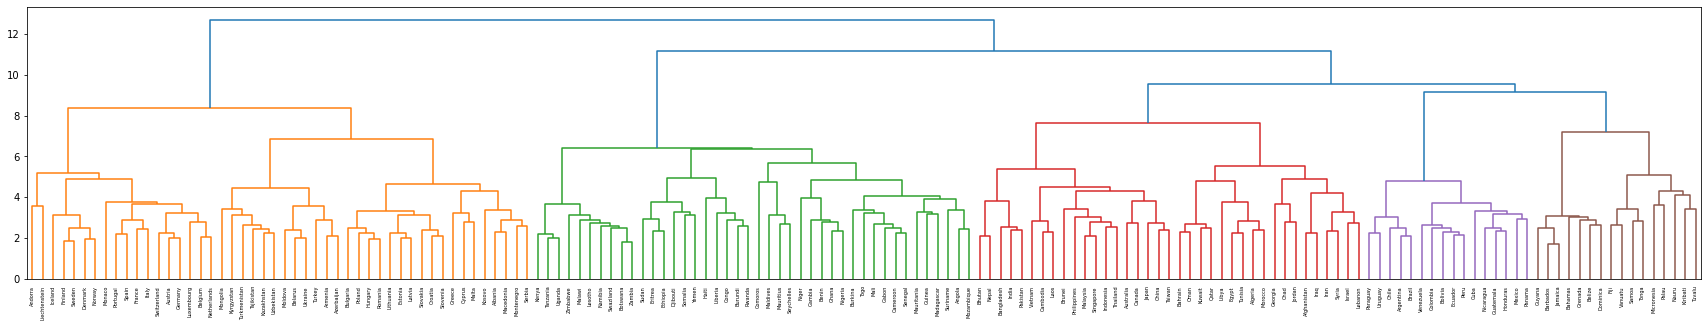

In [50]:
plt.figure(figsize=(30, 5))
plot_dendrogram(cls, p=5, labels=country)

In [51]:
!pip install bhtsne
import bhtsne

In [65]:
result = bhtsne.tsne(np.array(res['vector'].tolist()).astype(np.float64), dimensions=2, rand_seed=123)

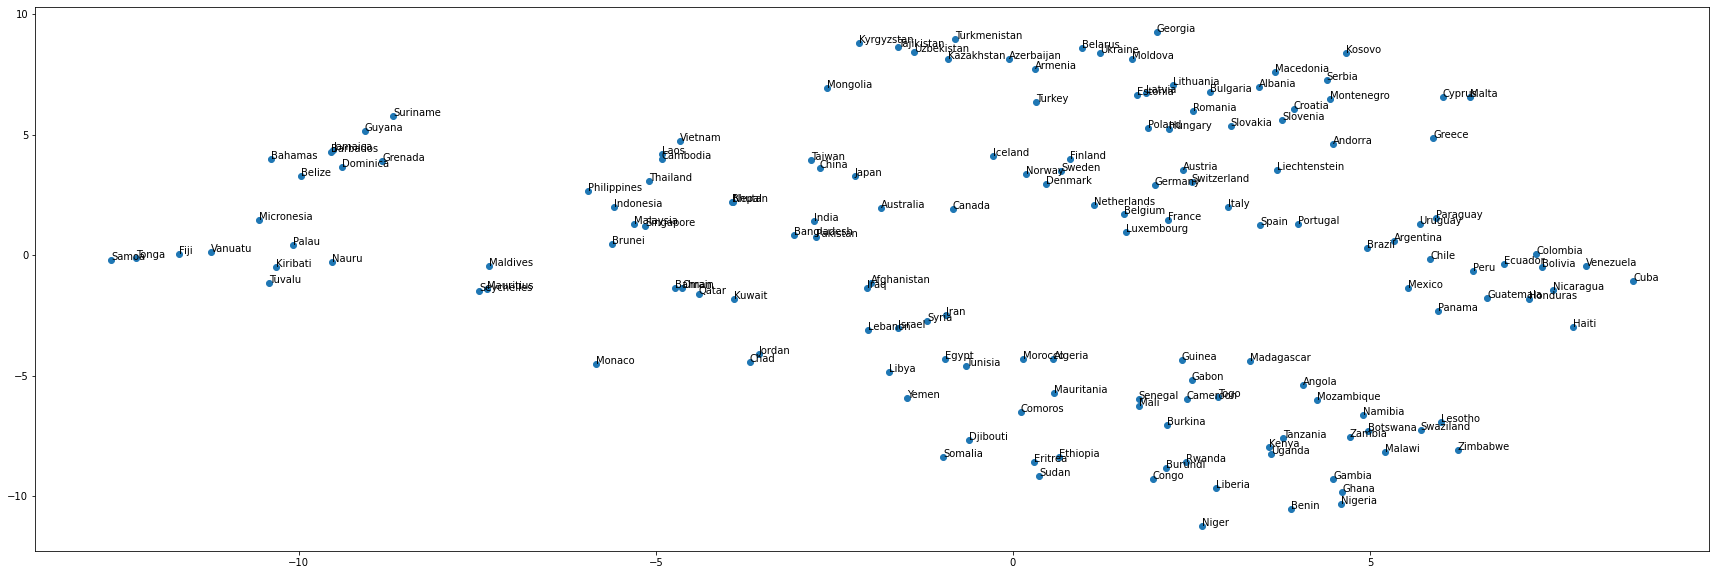

In [75]:
plt.figure(figsize = (30, 10))
plt.scatter(result.T[0], result.T[1])
for (x, y), name in zip(result, np.array(dataframe['country'])):
    plt.annotate(name, (x, y))